# **Scraping Tweets with playwright**

In [5]:
from datetime import datetime, timedelta
import pandas as pd
import nest_asyncio
nest_asyncio.apply()

In [2]:
# Install required packages (only once)
!pip install nest_asyncio playwright playwright-stealth pandas --quiet

# Install browser engines (Chromium) for Playwright
!playwright install

164.9 MiB [                    ] 0% 125.5s164.9 MiB [                    ] 0% 21.1s164.9 MiB [                    ] 0% 44.3s164.9 MiB [                    ] 0% 53.3s164.9 MiB [                    ] 0% 21.6s164.9 MiB [                    ] 0% 21.2s164.9 MiB [                    ] 0% 22.3s164.9 MiB [                    ] 0% 21.2s164.9 MiB [                    ] 0% 22.1s164.9 MiB [                    ] 0% 22.0s164.9 MiB [                    ] 0% 22.3s164.9 MiB [                    ] 1% 21.0s164.9 MiB [                    ] 1% 21.2s164.9 MiB [                    ] 1% 20.8s164.9 MiB [                    ] 1% 21.7s164.9 MiB [                    ] 1% 20.9s164.9 MiB [                    ] 1% 21.0s164.9 MiB [                    ] 1% 21.2s164.9 MiB [                    ] 1% 20.9s164.9 MiB [                    ] 1% 21.0s164.9 MiB [                    ] 1% 20.8s164.9 MiB [                    ] 2% 21.3s164.9 MiB [                    ] 2% 21.0s164.9 MiB [                    ] 2% 20.9s164.9 MiB [    

100.9 MiB [                    ] 0% 0.0s100.9 MiB [                    ] 0% 58.8s100.9 MiB [                    ] 0% 36.8s100.9 MiB [                    ] 0% 23.3s100.9 MiB [                    ] 0% 27.6s100.9 MiB [                    ] 0% 23.5s100.9 MiB [                    ] 0% 21.5s100.9 MiB [                    ] 0% 23.9s100.9 MiB [                    ] 0% 23.0s100.9 MiB [                    ] 0% 24.3s100.9 MiB [                    ] 0% 22.0s100.9 MiB [                    ] 1% 22.6s100.9 MiB [                    ] 1% 22.2s100.9 MiB [                    ] 1% 21.0s100.9 MiB [                    ] 1% 21.2s100.9 MiB [                    ] 1% 20.1s100.9 MiB [                    ] 1% 19.4s100.9 MiB [                    ] 1% 19.1s100.9 MiB [                    ] 1% 20.1s100.9 MiB [                    ] 2% 19.6s100.9 MiB [                    ] 2% 19.5s100.9 MiB [                    ] 2% 19.1s100.9 MiB [                    ] 2% 19.3s100.9 MiB [=                   ] 2% 19.4s100.9 MiB [=     

100.9 MiB [=================   ] 85% 2.2s100.9 MiB [=================   ] 86% 2.2s100.9 MiB [=================   ] 86% 2.1s100.9 MiB [=================   ] 86% 2.5s100.9 MiB [=================   ] 87% 2.5s100.9 MiB [=================   ] 87% 2.4s100.9 MiB [==================  ] 87% 2.4s100.9 MiB [==================  ] 88% 2.3s100.9 MiB [==================  ] 88% 2.2s100.9 MiB [==================  ] 88% 2.1s100.9 MiB [==================  ] 89% 2.1s100.9 MiB [==================  ] 89% 2.0s100.9 MiB [==================  ] 89% 1.9s100.9 MiB [==================  ] 90% 1.9s100.9 MiB [==================  ] 90% 1.8s100.9 MiB [==================  ] 90% 1.7s100.9 MiB [==================  ] 91% 1.7s100.9 MiB [==================  ] 91% 1.6s100.9 MiB [==================  ] 92% 1.5s100.9 MiB [=================== ] 92% 1.4s100.9 MiB [=================== ] 93% 1.3s100.9 MiB [=================== ] 93% 1.2s100.9 MiB [=================== ] 94% 1.1s100.9 MiB [=================== ] 94% 1.0s100.9 MiB [=====

92 MiB [                    ] 0% 0.0s92 MiB [                    ] 0% 12.3s92 MiB [                    ] 0% 15.9s92 MiB [                    ] 0% 40.6s92 MiB [                    ] 0% 24.2s92 MiB [                    ] 0% 19.5s92 MiB [                    ] 0% 18.1s92 MiB [                    ] 1% 16.3s92 MiB [                    ] 1% 15.8s92 MiB [                    ] 1% 15.5s92 MiB [                    ] 1% 15.1s92 MiB [                    ] 1% 14.8s92 MiB [                    ] 1% 15.3s92 MiB [                    ] 1% 14.8s92 MiB [                    ] 2% 14.0s92 MiB [                    ] 2% 13.9s92 MiB [                    ] 2% 14.2s92 MiB [=                   ] 2% 14.1s92 MiB [=                   ] 2% 13.9s92 MiB [=                   ] 3% 13.3s92 MiB [=                   ] 3% 13.8s92 MiB [=                   ] 3% 14.0s92 MiB [=                   ] 3% 13.8s92 MiB [=                   ] 3% 13.6s92 MiB [=                   ] 3% 14.0s92 MiB [=                   ] 4% 12.7s92 MiB [=    

92 MiB [===========         ] 56% 5.3s92 MiB [===========         ] 56% 5.2s92 MiB [===========         ] 57% 5.2s92 MiB [============        ] 57% 5.2s92 MiB [============        ] 57% 5.1s92 MiB [============        ] 58% 5.1s92 MiB [============        ] 58% 5.0s92 MiB [============        ] 59% 5.0s92 MiB [============        ] 59% 4.9s92 MiB [============        ] 60% 4.8s92 MiB [============        ] 60% 4.7s92 MiB [============        ] 61% 4.7s92 MiB [============        ] 61% 4.6s92 MiB [============        ] 62% 4.6s92 MiB [=============       ] 62% 4.5s92 MiB [=============       ] 63% 4.5s92 MiB [=============       ] 63% 4.4s92 MiB [=============       ] 64% 4.4s92 MiB [=============       ] 64% 4.3s92 MiB [=============       ] 65% 4.2s92 MiB [=============       ] 66% 4.1s92 MiB [=============       ] 66% 4.0s92 MiB [=============       ] 67% 4.0s92 MiB [==============      ] 67% 3.9s92 MiB [==============      ] 68% 3.9s92 MiB [==============      ] 68% 3.8s92 MiB [====

In [3]:
# Manual Login

import asyncio
from playwright.async_api import async_playwright

async def login_and_save_storage():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=False)
        context = await browser.new_context()
        page = await context.new_page()

        await page.goto("https://twitter.com/login")
        print("Log in manually in the browser window...")

        await asyncio.sleep(70)  # Give yourself time to log in

        await context.storage_state(path="twitter_auth.json")
        print("Session saved to twitter_auth.json")
        await browser.close()

asyncio.run(login_and_save_storage())

🕐 Please log in manually in the browser window...
✅ Session saved to twitter_auth.json


In [41]:
# Testing scraping method for single tweet 

async def test_single_tweet():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        page = await context.new_page()

        # Navigate to a single tweet
        await page.goto("https://x.com/StockMKTNewz/status/1889344331053404337")

        # Extract Tweet
        await page.wait_for_selector("article[aria-labelledby]", timeout=10000)  # Wait for up to 10s
        tweet = await page.query_selector("article[aria-labelledby]")

        if tweet:
            try:
                # Extract Date
                time_element = await tweet.query_selector("time")
                date = await time_element.get_attribute("datetime") if time_element else "Unknown"

                # Extract Text
                text_element = await tweet.query_selector("div[lang]")
                text = await text_element.inner_text() if text_element else "Unknown"

                # Extract Username
                handles = await tweet.query_selector_all("a")
                username = "Unknown"
                for h in handles:
                    handle_text = await h.inner_text() or await h.evaluate("(el) => el.textContent")
                    if handle_text.startswith("@"):
                        username = handle_text
                        break  # Stop at first valid username

                print(f"📌 Tweet Extracted:\n- Date: {date}\n- Username: {username}\n- Text: {text}")

            except Exception as e:
                print(f"Error extracting tweet: {e}")

        else:
            print("No tweet found!")

        await browser.close()

# Run the test
asyncio.run(test_single_tweet())

📌 Tweet Extracted:
- Date: 2025-02-11T16:02:45.000Z
- Username: @StockMKTNewz
- Text: Netflix $NFLX is exploring partnerships with podcasters to bring video podcasts to its platform - Insider


In [8]:
import random
from datetime import datetime, timedelta

nest_asyncio.apply()

async def scrape_twitter(stock, start_date, end_date, accounts, retries=3, timeout=120000):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=False)
        context = await browser.new_context(storage_state="twitter_auth.json")
        page = await context.new_page()

        all_tweets = []  # Store tweets from all accounts

        for account in accounts:
            print(f"🔄 Collecting tweets for {account} from {start_date} to {end_date}")
            search_query = f"{stock} from:{account} since:{start_date} until:{end_date} lang:en"
            final_url = (
                f"https://twitter.com/search?q={search_query.replace(' ', '%20')}&src=typed_query&f=live"
            )

            print(f"🔍 Searching {account}: {final_url}")
            await page.goto(final_url, timeout=timeout)

            # Click "Latest" tab explicitly after search loads
            try:
                await page.wait_for_selector("text=Latest", timeout=10000)
                await page.click("text=Latest")
                print("✅ Clicked 'Latest' tab.")
            except Exception as e:
                print(f"⚠️ 'Latest' tab click skipped - error: {e}")

            # Ensure tweets load before scraping, but handle cases where no tweets exist
            try:
                await page.wait_for_selector("article[aria-labelledby], article", timeout=15000) #note that twitter frequently changes DOM structure
            except:
                print(f"⚠️ No tweets found for {account}. Skipping...")
                all_tweets.append({"tweet": "No tweets found", "date": "N/A", "account": account})
                continue  # Skip to the next account

            # Fetch initial tweets
            tweet_elements = await page.query_selector_all("article[aria-labelledby], article")
            print(f"🔍 Found {len(tweet_elements)} tweets before scrolling.")

            # Scroll dynamically **only if tweets exist**
            if tweet_elements:
                previous_tweet_count = 0
                scroll_attempts = 0

                while scroll_attempts < 50:  # Avoid infinite scrolling
                    await page.evaluate("window.scrollBy(0, 2000 + Math.random() * 500)")
                    await asyncio.sleep(random.uniform(2, 5))

                    tweet_elements = await page.query_selector_all("article[aria-labelledby], article")
                    current_tweet_count = len(tweet_elements)

                    if current_tweet_count == previous_tweet_count:  # No new tweets loaded
                        print(f"✅ No new tweets detected for {account}, stopping scroll.")
                        break

                    previous_tweet_count = current_tweet_count
                    scroll_attempts += 1
            else:
                print(f"⚠️ No tweets detected initially for {account}, skipping scrolling.")

            # Extract tweets
            for tweet in tweet_elements:
                try:
                    time_element = await tweet.query_selector("time")
                    date = await time_element.get_attribute("datetime") if time_element else "Unknown"

                    text_element = await tweet.query_selector("div[lang]")
                    text = await text_element.inner_text() if text_element else "Unknown"

                    handles = await tweet.query_selector_all("a")
                    username = "Unknown"
                    for h in handles:
                        handle_text = await h.inner_text() or await h.evaluate("(el) => el.textContent")
                        if handle_text.startswith("@"): 
                            username = handle_text
                            break

                    # Append all tweets without filtering by "$NFLX"
                    all_tweets.append({
                        "tweet": text.strip(),
                        "date": date,
                        "account": username
                    })

                except Exception as e:
                    print(f"⚠️ Error processing tweet: {e}")

        await browser.close()
        return pd.DataFrame(all_tweets).drop_duplicates(subset=["tweet"])  # Remove duplicate tweets


async def collect_tweets(stock, start_date, end_date, accounts, filename_prefix):
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
    all_tweets = pd.DataFrame()
    weeks_processed = 0

    while current_date < end_date_dt:
        week_end = min(current_date + timedelta(days=7), end_date_dt)
        week_start_str = current_date.strftime("%Y-%m-%d")
        week_end_str = week_end.strftime("%Y-%m-%d")
        print(f"🔄 Collecting tweets from {week_start_str} to {week_end_str}")

        weekly_df = await scrape_twitter(stock, week_start_str, week_end_str, accounts)
        all_tweets = pd.concat([all_tweets, weekly_df], ignore_index=True)
        current_date = week_end
        weeks_processed += 1

        # Save progress every 4 weeks
        if weeks_processed % 4 == 0:
            checkpoint_file = f"{filename_prefix}_checkpoint_{week_start_str}.csv"
            all_tweets.to_csv(checkpoint_file, index=False)
            print(f"💾 Saved intermediate results to {checkpoint_file}")

    return all_tweets

start_date = "2024-06-01"
end_date = "2025-04-01"
    
async def main():
    accounts = ["cnbc", "Stocktwits", "WSJ", "reuters", "forbes", "RobinJPowell","WSJDealJournal", "Benzinga", "EventDrivenMgr", "SeekingAlpha", "WSJmarkets", "Business","tradingguru", "marketcurrents", "financialtimes", "elonmusk", "SpiegelPeter", "BillGates", "bespokeinvest", "AlphaTrends", "StockMKTNewz", "PeterLBrandt", "JPMorgan", "SvenHenrich", "Bloomberg"]

    
    netflix_tweets = await collect_tweets("Netflix OR $NFLX", start_date, end_date, accounts, "netflix")
    netflix_tweets.to_csv("netflix_tweets.csv", index=False)
    print(f"✅ Saved {len(netflix_tweets)} tweets for Netflix to netflix_tweets.csv")
    
    amazon_tweets = await collect_tweets("Amazon OR $AMZN", start_date, end_date, accounts, "amazon")
    amazon_tweets.to_csv("amazon_tweets.csv", index=False)
    print(f"✅ Saved {len(amazon_tweets)} tweets for Amazon to amazon_tweets.csv")

asyncio.run(main())

🔄 Collecting tweets from 2024-12-13 to 2024-12-20
🔄 Collecting tweets for cnbc from 2024-12-13 to 2024-12-20
🔍 Searching cnbc: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:cnbc%20since:2024-12-13%20until:2024-12-20%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 3 tweets before scrolling.
✅ No new tweets detected for cnbc, stopping scroll.
🔄 Collecting tweets for Stocktwits from 2024-12-13 to 2024-12-20
🔍 Searching Stocktwits: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:Stocktwits%20since:2024-12-13%20until:2024-12-20%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 1 tweets before scrolling.
✅ No new tweets detected for Stocktwits, stopping scroll.
🔄 Collecting tweets for WSJ from 2024-12-13 to 2024-12-20
🔍 Searching WSJ: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:WSJ%20since:2024-12-13%20until:2024-12-20%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 2 tweets before scrolling.
✅ No new tweets detec

🔄 Collecting tweets for cnbc from 2024-12-20 to 2024-12-27
🔍 Searching cnbc: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:cnbc%20since:2024-12-20%20until:2024-12-27%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 3 tweets before scrolling.
✅ No new tweets detected for cnbc, stopping scroll.
🔄 Collecting tweets for Stocktwits from 2024-12-20 to 2024-12-27
🔍 Searching Stocktwits: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:Stocktwits%20since:2024-12-20%20until:2024-12-27%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 2 tweets before scrolling.
✅ No new tweets detected for Stocktwits, stopping scroll.
🔄 Collecting tweets for WSJ from 2024-12-20 to 2024-12-27
🔍 Searching WSJ: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:WSJ%20since:2024-12-20%20until:2024-12-27%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 3 tweets before scrolling.
✅ No new tweets detected for WSJ, stopping scroll.
🔄 Collecting tweets 

✅ Clicked 'Latest' tab.
⚠️ No tweets found for Stocktwits. Skipping...
🔄 Collecting tweets for WSJ from 2024-12-27 to 2025-01-03
🔍 Searching WSJ: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:WSJ%20since:2024-12-27%20until:2025-01-03%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for WSJ. Skipping...
🔄 Collecting tweets for reuters from 2024-12-27 to 2025-01-03
🔍 Searching reuters: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:reuters%20since:2024-12-27%20until:2025-01-03%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for reuters. Skipping...
🔄 Collecting tweets for forbes from 2024-12-27 to 2025-01-03
🔍 Searching forbes: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:forbes%20since:2024-12-27%20until:2025-01-03%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for forbes. Skipping...
🔄 Collecting tweets for RobinJPowell from 2024-12-27 to 2025-01-03
🔍 Searching RobinJPowell

✅ No new tweets detected for WSJ, stopping scroll.
🔄 Collecting tweets for reuters from 2025-01-03 to 2025-01-10
🔍 Searching reuters: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:reuters%20since:2025-01-03%20until:2025-01-10%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for reuters. Skipping...
🔄 Collecting tweets for forbes from 2025-01-03 to 2025-01-10
🔍 Searching forbes: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:forbes%20since:2025-01-03%20until:2025-01-10%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 4 tweets before scrolling.
✅ No new tweets detected for forbes, stopping scroll.
🔄 Collecting tweets for RobinJPowell from 2025-01-03 to 2025-01-10
🔍 Searching RobinJPowell: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:RobinJPowell%20since:2025-01-03%20until:2025-01-10%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for RobinJPowell. Skipping...
🔄 Collecting tweets for WSJDe

⚠️ No tweets found for reuters. Skipping...
🔄 Collecting tweets for forbes from 2025-01-10 to 2025-01-17
🔍 Searching forbes: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:forbes%20since:2025-01-10%20until:2025-01-17%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for forbes. Skipping...
🔄 Collecting tweets for RobinJPowell from 2025-01-10 to 2025-01-17
🔍 Searching RobinJPowell: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:RobinJPowell%20since:2025-01-10%20until:2025-01-17%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for RobinJPowell. Skipping...
🔄 Collecting tweets for WSJDealJournal from 2025-01-10 to 2025-01-17
🔍 Searching WSJDealJournal: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:WSJDealJournal%20since:2025-01-10%20until:2025-01-17%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for WSJDealJournal. Skipping...
🔄 Collecting tweets for Benzinga from 2025-01-10 to 20

✅ Clicked 'Latest' tab.
⚠️ No tweets found for RobinJPowell. Skipping...
🔄 Collecting tweets for WSJDealJournal from 2025-01-17 to 2025-01-24
🔍 Searching WSJDealJournal: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:WSJDealJournal%20since:2025-01-17%20until:2025-01-24%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for WSJDealJournal. Skipping...
🔄 Collecting tweets for Benzinga from 2025-01-17 to 2025-01-24
🔍 Searching Benzinga: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:Benzinga%20since:2025-01-17%20until:2025-01-24%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 4 tweets before scrolling.
✅ No new tweets detected for Benzinga, stopping scroll.
🔄 Collecting tweets for EventDrivenMgr from 2025-01-17 to 2025-01-24
🔍 Searching EventDrivenMgr: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:EventDrivenMgr%20since:2025-01-17%20until:2025-01-24%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets f

✅ Clicked 'Latest' tab.
⚠️ No tweets found for WSJDealJournal. Skipping...
🔄 Collecting tweets for Benzinga from 2025-01-24 to 2025-01-31
🔍 Searching Benzinga: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:Benzinga%20since:2025-01-24%20until:2025-01-31%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for Benzinga. Skipping...
🔄 Collecting tweets for EventDrivenMgr from 2025-01-24 to 2025-01-31
🔍 Searching EventDrivenMgr: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:EventDrivenMgr%20since:2025-01-24%20until:2025-01-31%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for EventDrivenMgr. Skipping...
🔄 Collecting tweets for SeekingAlpha from 2025-01-24 to 2025-01-31
🔍 Searching SeekingAlpha: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:SeekingAlpha%20since:2025-01-24%20until:2025-01-31%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for SeekingAlpha. Skipping...
🔄 Collecting tw

✅ Clicked 'Latest' tab.
⚠️ No tweets found for EventDrivenMgr. Skipping...
🔄 Collecting tweets for SeekingAlpha from 2025-01-31 to 2025-02-01
🔍 Searching SeekingAlpha: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:SeekingAlpha%20since:2025-01-31%20until:2025-02-01%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for SeekingAlpha. Skipping...
🔄 Collecting tweets for WSJmarkets from 2025-01-31 to 2025-02-01
🔍 Searching WSJmarkets: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:WSJmarkets%20since:2025-01-31%20until:2025-02-01%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for WSJmarkets. Skipping...
🔄 Collecting tweets for Business from 2025-01-31 to 2025-02-01
🔍 Searching Business: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:Business%20since:2025-01-31%20until:2025-02-01%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 1 tweets before scrolling.
✅ No new tweets detected for Business, st

In [34]:
netflix_df = netflix_df.drop_duplicates(subset='tweet', keep='first')
netflix_df.shape

(584, 3)

In [35]:
amazon_df = amazon_df.drop_duplicates(subset='tweet', keep='first')
amazon_df.shape

In [5]:
netflix_df = pd.read_csv("netflix_all_tweets.csv")
amazon_df = pd.read_csv("amazon_all_tweets.csv")
print(netflix_df.shape)
print(amazon_df.shape)

(584, 3)
(1062, 3)


#**Tweet Preprocessing**

In [6]:
# Combining both dataframes into one with adding a column of netflix / amzn
amazon_df["stock"] = "amazon"
netflix_df["stock"] = "netflix"
tweet_df = pd.concat([amazon_df, netflix_df])
tweet_df["date"] = pd.to_datetime(tweet_df["date"]).dt.date
tweet_df = tweet_df[tweet_df["tweet"] != "No tweets found"] # dropping
tweet_df

tweet        date  \
0    Trump sued over purge at NLRB, regulator targe...  2025-02-05   
1    Amazon announces hardware event for Feb. 26 as...  2025-02-05   
2    Amazon to face legal action after Quebec wareh...  2025-02-04   
3    Here are Monday's biggest analyst calls: Nvidi...  2025-02-03   
4    Earnings playbook: Your guide to the busiest w...  2025-02-02   
..                                                 ...         ...   
579  RT Congrats to America! A sexual assaulter, dr...  2025-01-25   
580  $NFLX $AAPL $GM - Notable analyst calls this w...  2025-01-25   
581                                Can I be player 230  2025-01-30   
582  Netflix $NFLX just confirmed the final season ...  2025-01-30   
583  UK  CONSIDERS MAKING NETFLIX $NFLX USERS PAY L...  2025-01-28   

             account    stock  
0              @CNBC   amazon  
1              @CNBC   amazon  
2              @CNBC   amazon  
3              @CNBC   amazon  
4              @CNBC   amazon  
..               ...      ...  
579     @TradingGuru  netflix  
580  @MarketCurrents  netflix  
581    @StockMKTNewz  netflix  
582    @StockMKTNewz  netflix  
583    @StockMKTNewz  netflix  

[1644 rows x 4 columns]

In [7]:
import preprocessor as p
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Download NLTK resources
nltk.download("punkt")
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

# Define financial stopwords that should NOT be removed
financial_stopwords = {"up", "down", "bullish", "bearish", "profit", "loss", "growth", "decline"}

def preprocess_pipeline(tweet):
    # Remove URLs, mentions, hashtags, emojis, and reserved words
    tweet = p.clean(str(tweet))

    # Remove stock symbols ($NFLX, $AMZN)
    tweet = re.sub(r"[$]+[a-zA-Z]+", "", tweet)

    # Remove punctuation & numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)

    # Normalize text (reduce lengthening)
    pattern = re.compile(r"(.)\1{2,}")
    tweet = pattern.sub(r"\1\1", tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Tokenization & Stopword Removal (EXCLUDING financial stopwords)
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words("english") or word in financial_stopwords]

    return " ".join(tokens)  # Convert back to string

# Apply pipeline to all tweets
tweet_df["processed_tweet"] = tweet_df["tweet"].apply(preprocess_pipeline)

tweet_df.head()

[nltk_data] Downloading package punkt to /home/ilse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ilse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tweet        date account  \
0  Trump sued over purge at NLRB, regulator targe...  2025-02-05   @CNBC   
1  Amazon announces hardware event for Feb. 26 as...  2025-02-05   @CNBC   
2  Amazon to face legal action after Quebec wareh...  2025-02-04   @CNBC   
3  Here are Monday's biggest analyst calls: Nvidi...  2025-02-03   @CNBC   
4  Earnings playbook: Your guide to the busiest w...  2025-02-02   @CNBC   

    stock                                    processed_tweet  
0  amazon  trump sued purge nlrb regulator targeted space...  
1  amazon  amazon announces hardware event feb race relea...  
2  amazon  amazon face legal action quebec warehouse clos...  
3  amazon  monday biggest analyst call nvidia apple tesla...  
4  amazon  earnings playbook guide busiest week season in...

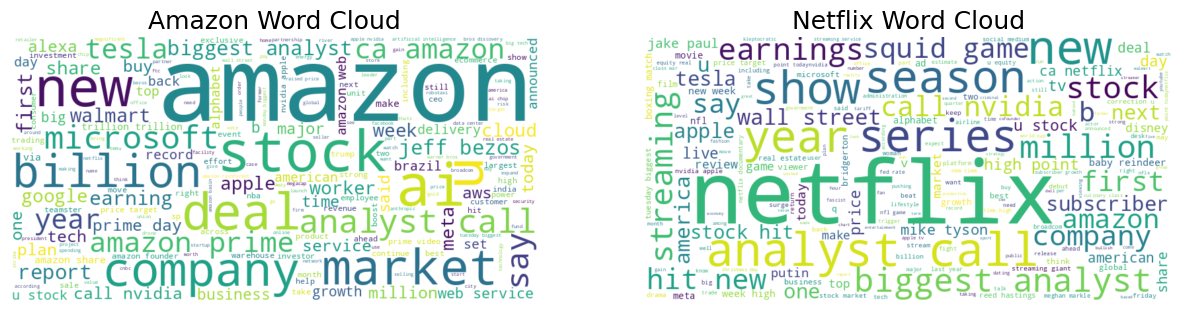

In [8]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets for Amazon and Netflix separately
amazon_tweets = " ".join(tweet_df[tweet_df["stock"] == "amazon"]["processed_tweet"])
netflix_tweets = " ".join(tweet_df[tweet_df["stock"] == "netflix"]["processed_tweet"])

# Generate word clouds
amazon_wordcloud = WordCloud(background_color="white", width=800, height=400).generate(amazon_tweets)
netflix_wordcloud = WordCloud(background_color="white", width=800, height=400).generate(netflix_tweets)

# Display word clouds side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].imshow(amazon_wordcloud, interpolation="bilinear")
ax[0].set_title("Amazon Word Cloud", fontsize=18)
ax[0].axis("off")

ax[1].imshow(netflix_wordcloud, interpolation="bilinear")
ax[1].set_title("Netflix Word Cloud", fontsize=18)
ax[1].axis("off")

plt.show()

# **VADER - Sentiment Analysis**

In [144]:
!pip install vaderSentiment

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [10]:
# Get Sentiment after pre-processing

tweet_df['neg'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['neg'])
tweet_df['neu'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['neu'])
tweet_df['pos'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['pos'])
tweet_df['compound'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['compound'])

tweet_df

tweet        date  \
0    Trump sued over purge at NLRB, regulator targe...  2025-02-05   
1    Amazon announces hardware event for Feb. 26 as...  2025-02-05   
2    Amazon to face legal action after Quebec wareh...  2025-02-04   
3    Here are Monday's biggest analyst calls: Nvidi...  2025-02-03   
4    Earnings playbook: Your guide to the busiest w...  2025-02-02   
..                                                 ...         ...   
579  RT Congrats to America! A sexual assaulter, dr...  2025-01-25   
580  $NFLX $AAPL $GM - Notable analyst calls this w...  2025-01-25   
581                                Can I be player 230  2025-01-30   
582  Netflix $NFLX just confirmed the final season ...  2025-01-30   
583  UK  CONSIDERS MAKING NETFLIX $NFLX USERS PAY L...  2025-01-28   

             account    stock  \
0              @CNBC   amazon   
1              @CNBC   amazon   
2              @CNBC   amazon   
3              @CNBC   amazon   
4              @CNBC   amazon   
..               ...      ...   
579     @TradingGuru  netflix   
580  @MarketCurrents  netflix   
581    @StockMKTNewz  netflix   
582    @StockMKTNewz  netflix   
583    @StockMKTNewz  netflix   

                                       processed_tweet    neg    neu    pos  \
0    trump sued purge nlrb regulator targeted space...  0.000  0.825  0.175   
1    amazon announces hardware event feb race relea...  0.000  0.825  0.175   
2    amazon face legal action quebec warehouse clos...  0.000  0.714  0.286   
3    monday biggest analyst call nvidia apple tesla...  0.000  0.848  0.152   
4    earnings playbook guide busiest week season in...  0.000  0.841  0.159   
..                                                 ...    ...    ...    ...   
579  congrats america sexual assaulter drunkard swi...  0.000  0.710  0.290   
580  notable analyst call week apple ea netflix sto...  0.000  0.847  0.153   
581                                             player  0.000  1.000  0.000   
582  netflix confirmed final season squid game rele...  0.000  1.000  0.000   
583  uk considers making netflix user pay license f...  0.123  0.877  0.000   

     compound  
0      0.1779  
1      0.1779  
2      0.2960  
3      0.2449  
4      0.1779  
..        ...  
579    0.5994  
580    0.2023  
581    0.0000  
582    0.0000  
583   -0.1027  

[1644 rows x 9 columns]

In [11]:
##Defining classes
def analyse_sentiment(compound):
    if compound > 0:
        return "Positive_VADER"
    if compound == 0:
        return "Neutral_VADER"
    if compound < 0:
        return "Negative_VADER"

# Apply the funtion on Polarity column and add the results into a new column
tweet_df["class_VADER"] = tweet_df["compound"].apply(analyse_sentiment)

print(tweet_df.shape)
tweet_df

(1644, 10)


tweet        date  \
0    Trump sued over purge at NLRB, regulator targe...  2025-02-05   
1    Amazon announces hardware event for Feb. 26 as...  2025-02-05   
2    Amazon to face legal action after Quebec wareh...  2025-02-04   
3    Here are Monday's biggest analyst calls: Nvidi...  2025-02-03   
4    Earnings playbook: Your guide to the busiest w...  2025-02-02   
..                                                 ...         ...   
579  RT Congrats to America! A sexual assaulter, dr...  2025-01-25   
580  $NFLX $AAPL $GM - Notable analyst calls this w...  2025-01-25   
581                                Can I be player 230  2025-01-30   
582  Netflix $NFLX just confirmed the final season ...  2025-01-30   
583  UK  CONSIDERS MAKING NETFLIX $NFLX USERS PAY L...  2025-01-28   

             account    stock  \
0              @CNBC   amazon   
1              @CNBC   amazon   
2              @CNBC   amazon   
3              @CNBC   amazon   
4              @CNBC   amazon   
..               ...      ...   
579     @TradingGuru  netflix   
580  @MarketCurrents  netflix   
581    @StockMKTNewz  netflix   
582    @StockMKTNewz  netflix   
583    @StockMKTNewz  netflix   

                                       processed_tweet    neg    neu    pos  \
0    trump sued purge nlrb regulator targeted space...  0.000  0.825  0.175   
1    amazon announces hardware event feb race relea...  0.000  0.825  0.175   
2    amazon face legal action quebec warehouse clos...  0.000  0.714  0.286   
3    monday biggest analyst call nvidia apple tesla...  0.000  0.848  0.152   
4    earnings playbook guide busiest week season in...  0.000  0.841  0.159   
..                                                 ...    ...    ...    ...   
579  congrats america sexual assaulter drunkard swi...  0.000  0.710  0.290   
580  notable analyst call week apple ea netflix sto...  0.000  0.847  0.153   
581                                             player  0.000  1.000  0.000   
582  netflix confirmed final season squid game rele...  0.000  1.000  0.000   
583  uk considers making netflix user pay license f...  0.123  0.877  0.000   

     compound     class_VADER  
0      0.1779  Positive_VADER  
1      0.1779  Positive_VADER  
2      0.2960  Positive_VADER  
3      0.2449  Positive_VADER  
4      0.1779  Positive_VADER  
..        ...             ...  
579    0.5994  Positive_VADER  
580    0.2023  Positive_VADER  
581    0.0000   Neutral_VADER  
582    0.0000   Neutral_VADER  
583   -0.1027  Negative_VADER  

[1644 rows x 10 columns]

In [12]:
tweet_df = tweet_df.sort_values(by="date", ascending=True) 
tweet_df

tweet        date  \
100  $NVDA is now larger than $AMZN, $WMT and $NFLX...  2024-06-01   
359  $NVDA is now larger than $AMZN, $WMT and $NFLX...  2024-06-01   
117  Nvidia $NVDA is larger than the combined marke...  2024-06-01   
377  Spotify is taking share from Apple and Amazon....  2024-06-02   
368  Amazon NGO set up in memory of British reporte...  2024-06-03   
..                                                 ...         ...   
182  RT \n@realDonaldTrump\n’s kleptocratic adminis...  2025-03-31   
92   RT ⁦\n@realDonaldTrump\n⁩: ‘You’ll be winning ...  2025-03-31   
93   RT The kleptocratic, oligarchic, incompetent, ...  2025-03-31   
188  Amazon $AMZN just released a new AI model call...  2025-03-31   
187     Alexa Plus $AMZN just launched in early access  2025-03-31   

           account    stock  \
100    @Stocktwits  netflix   
359    @Stocktwits   amazon   
117  @StockMKTNewz  netflix   
377      @business   amazon   
368       @Reuters   amazon   
..             ...      ...   
182   @TradingGuru   amazon   
92    @TradingGuru  netflix   
93    @TradingGuru  netflix   
188  @StockMKTNewz   amazon   
187  @StockMKTNewz   amazon   

                                       processed_tweet    neg    neu    pos  \
100                            larger combinedlet sink  0.000  1.000  0.000   
359                            larger combinedlet sink  0.000  1.000  0.000   
117  nvidia larger combined market cap amazon walma...  0.000  0.805  0.195   
377  spotify taking share apple amazon also suffers...  0.172  0.611  0.217   
368  amazon ngo set up memory british reporter murd...  0.336  0.534  0.130   
..                                                 ...    ...    ...    ...   
182  kleptocratic administration imposes tariff all...  0.290  0.710  0.000   
92              youll winning much youll broke winning  0.222  0.238  0.540   
93   kleptocratic oligarchic incompetent immoral ad...  0.533  0.333  0.133   
188  amazon released new ai model called nova act t...  0.000  0.892  0.108   
187                   alexa plus launched early access  0.000  0.727  0.273   

     compound     class_VADER  
100    0.0000   Neutral_VADER  
359    0.0000   Neutral_VADER  
117    0.1779  Positive_VADER  
377   -0.0516  Negative_VADER  
368   -0.5719  Negative_VADER  
..        ...             ...  
182   -0.6486  Negative_VADER  
92     0.6124  Positive_VADER  
93    -0.8020  Negative_VADER  
188    0.1779  Positive_VADER  
187    0.1280  Positive_VADER  

[1644 rows x 10 columns]

In [13]:
# Generate dummy variables for class_VADER
dummies_VADER = pd.get_dummies(tweet_df["class_VADER"])
tweet_df = pd.concat([tweet_df, dummies_VADER], axis=1)

# Ensure all expected columns exist before grouping
expected_cols = ["Negative_VADER", "Neutral_VADER", "Positive_VADER"]
for col in expected_cols:
    if col not in tweet_df.columns:
        tweet_df[col] = 0  # Add missing column with default value

# Group by date to sum counts per day
nrclass_VADER = tweet_df.groupby(["stock","date"])[expected_cols].sum().reset_index()

# Shift values forward by one day **one column at a time** to avoid length mismatch
for col in expected_cols:
    nrclass_VADER[col] = nrclass_VADER[col].shift(1)

tweet_sentiment_df = nrclass_VADER

In [14]:
### DOUBLE CHECK if we have any NaN in the sentiment
tweet_sentiment_df.isna().sum()

stock             0
date              0
Negative_VADER    1
Neutral_VADER     1
Positive_VADER    1
dtype: int64

In [15]:
# Store the Data after Sentiment Analysis
tweet_sentiment_df.to_csv("tweet_sentiment_df.csv")

## Compare the Distrubution of Sentiment Classes across the stocks

### Upload the merged data sets for all three stocks

In [16]:
# Grouped Bar Chart

import plotly.graph_objects as go

# Group by stock and sum sentiment values
sentiment_sums = tweet_sentiment_df.groupby("stock")[["Negative_VADER", "Neutral_VADER", "Positive_VADER"]].sum().reset_index()

# Create grouped bar chart
fig = go.Figure(data=[
    go.Bar(name="Neutral", x=sentiment_sums["stock"], y=sentiment_sums["Neutral_VADER"]),
    go.Bar(name="Negative", x=sentiment_sums["stock"], y=sentiment_sums["Negative_VADER"]),
    go.Bar(name="Positive", x=sentiment_sums["stock"], y=sentiment_sums["Positive_VADER"])
])

# Update layout
fig.update_layout(
    barmode="group",
    title_text="Distribution of Sentiment Classes for Netflix & Amazon",
    title_font=dict(size=30),
    plot_bgcolor="white",
    xaxis_title="Stock",
    yaxis_title="Sentiment Count"
)

fig.show()


# **Getting Yahoo data**

In [168]:
import yfinance as yf

# Fetch historical market data
AMZN = yf.Ticker("AMZN")
NFLX = yf.Ticker("NFLX")

# Get historical data for Amazon
amazon_hist = AMZN.history(start="2024-06-01", end="2025-04-01")
amazon_hist["stock"] = "amazon"  # Add stock identifier

# Get historical data for Netflix
netflix_hist = NFLX.history(start="2024-06-01", end="2025-04-01")
netflix_hist["stock"] = "netflix"  # Add stock identifier

# Combine both datasets
financials = pd.concat([amazon_hist, netflix_hist], ignore_index=False)

print(financials.shape)
financials

#should replace for var
#start_date = "2025-02-09"
#end_date = "2025-02-13"

(414, 8)


Open        High         Low       Close  \
Date                                                                        
2024-06-03 00:00:00-04:00  177.699997  178.699997  175.919998  178.339996   
2024-06-04 00:00:00-04:00  177.639999  179.820007  176.440002  179.339996   
2024-06-05 00:00:00-04:00  180.100006  181.500000  178.750000  181.279999   
2024-06-06 00:00:00-04:00  181.750000  185.000000  181.490005  185.000000   
2024-06-07 00:00:00-04:00  184.899994  186.289993  183.360001  184.300003   
...                               ...         ...         ...         ...   
2025-03-25 00:00:00-04:00  978.179993  998.700012  977.109985  997.280029   
2025-03-26 00:00:00-04:00  993.809998  996.789978  966.320007  970.650024   
2025-03-27 00:00:00-04:00  974.219971  989.000000  966.369995  976.719971   
2025-03-28 00:00:00-04:00  972.000000  974.979980  929.229980  933.849976   
2025-03-31 00:00:00-04:00  920.530029  934.479980  900.590027  932.530029   

                             Volume  Dividends  Stock Splits    stock  
Date                                                                   
2024-06-03 00:00:00-04:00  30786600        0.0           0.0   amazon  
2024-06-04 00:00:00-04:00  27198400        0.0           0.0   amazon  
2024-06-05 00:00:00-04:00  32116400        0.0           0.0   amazon  
2024-06-06 00:00:00-04:00  31371200        0.0           0.0   amazon  
2024-06-07 00:00:00-04:00  28021500        0.0           0.0   amazon  
...                             ...        ...           ...      ...  
2025-03-25 00:00:00-04:00   3782200        0.0           0.0  netflix  
2025-03-26 00:00:00-04:00   3527400        0.0           0.0  netflix  
2025-03-27 00:00:00-04:00   3047200        0.0           0.0  netflix  
2025-03-28 00:00:00-04:00   4422700        0.0           0.0  netflix  
2025-03-31 00:00:00-04:00   4634100        0.0           0.0  netflix  

[414 rows x 8 columns]

In [169]:
##Calculate returns
financials["returns"]=financials["Close"]/financials["Close"].shift(1)-1

##Get class
def analyse_returns(returns):
    if returns >= 0:
        return "1"
    else:
      return "0"

# Apply the function on return column and add the results into a new column
financials["return_sign"] = financials["returns"].apply(analyse_returns)

print(financials.shape)
financials

(414, 10)


Open        High         Low       Close  \
Date                                                                        
2024-06-03 00:00:00-04:00  177.699997  178.699997  175.919998  178.339996   
2024-06-04 00:00:00-04:00  177.639999  179.820007  176.440002  179.339996   
2024-06-05 00:00:00-04:00  180.100006  181.500000  178.750000  181.279999   
2024-06-06 00:00:00-04:00  181.750000  185.000000  181.490005  185.000000   
2024-06-07 00:00:00-04:00  184.899994  186.289993  183.360001  184.300003   
...                               ...         ...         ...         ...   
2025-03-25 00:00:00-04:00  978.179993  998.700012  977.109985  997.280029   
2025-03-26 00:00:00-04:00  993.809998  996.789978  966.320007  970.650024   
2025-03-27 00:00:00-04:00  974.219971  989.000000  966.369995  976.719971   
2025-03-28 00:00:00-04:00  972.000000  974.979980  929.229980  933.849976   
2025-03-31 00:00:00-04:00  920.530029  934.479980  900.590027  932.530029   

                             Volume  Dividends  Stock Splits    stock  \
Date                                                                    
2024-06-03 00:00:00-04:00  30786600        0.0           0.0   amazon   
2024-06-04 00:00:00-04:00  27198400        0.0           0.0   amazon   
2024-06-05 00:00:00-04:00  32116400        0.0           0.0   amazon   
2024-06-06 00:00:00-04:00  31371200        0.0           0.0   amazon   
2024-06-07 00:00:00-04:00  28021500        0.0           0.0   amazon   
...                             ...        ...           ...      ...   
2025-03-25 00:00:00-04:00   3782200        0.0           0.0  netflix   
2025-03-26 00:00:00-04:00   3527400        0.0           0.0  netflix   
2025-03-27 00:00:00-04:00   3047200        0.0           0.0  netflix   
2025-03-28 00:00:00-04:00   4422700        0.0           0.0  netflix   
2025-03-31 00:00:00-04:00   4634100        0.0           0.0  netflix   

                            returns return_sign  
Date                                             
2024-06-03 00:00:00-04:00       NaN           0  
2024-06-04 00:00:00-04:00  0.005607           1  
2024-06-05 00:00:00-04:00  0.010817           1  
2024-06-06 00:00:00-04:00  0.020521           1  
2024-06-07 00:00:00-04:00 -0.003784           0  
...                             ...         ...  
2025-03-25 00:00:00-04:00  0.026019           1  
2025-03-26 00:00:00-04:00 -0.026703           0  
2025-03-27 00:00:00-04:00  0.006253           1  
2025-03-28 00:00:00-04:00 -0.043892           0  
2025-03-31 00:00:00-04:00 -0.001413           0  

[414 rows x 10 columns]

In [170]:
## Dropping unnecessary columns
financials = financials.reset_index()
financials["date"] = pd.to_datetime(financials["Date"]).dt.date
financials = financials.drop(columns=["Open","High","Low","Close","Volume","Dividends", "Stock Splits","Date"])
print(financials.shape)
financials

(414, 4)


stock   returns return_sign        date
0     amazon       NaN           0  2024-06-03
1     amazon  0.005607           1  2024-06-04
2     amazon  0.010817           1  2024-06-05
3     amazon  0.020521           1  2024-06-06
4     amazon -0.003784           0  2024-06-07
..       ...       ...         ...         ...
409  netflix  0.026019           1  2025-03-25
410  netflix -0.026703           0  2025-03-26
411  netflix  0.006253           1  2025-03-27
412  netflix -0.043892           0  2025-03-28
413  netflix -0.001413           0  2025-03-31

[414 rows x 4 columns]

# **Supervised Machine Learning - SML**

## **SML on 3 sentiment classes**

### Merge the Datasets

In [171]:
###Merge
merged_sentiment = tweet_sentiment_df.merge(financials, on=["stock", "date"], how="inner")


print(merged_sentiment.shape)
merged_sentiment

# We have NaN in the first row --> So we drop(0) / dropna() in the next step

(343, 7)


stock        date  Negative_VADER  Neutral_VADER  Positive_VADER  \
0     amazon  2024-06-03             1.0            0.0             0.0   
1     amazon  2024-06-04             1.0            0.0             2.0   
2     amazon  2024-06-05             0.0            0.0             3.0   
3     amazon  2024-06-06             2.0            1.0             9.0   
4     amazon  2024-06-07             1.0            0.0             7.0   
..       ...         ...             ...            ...             ...   
338  netflix  2025-03-25             1.0            2.0             2.0   
339  netflix  2025-03-26             1.0            0.0             0.0   
340  netflix  2025-03-27             1.0            0.0             1.0   
341  netflix  2025-03-28             1.0            0.0             1.0   
342  netflix  2025-03-31             0.0            2.0             1.0   

      returns return_sign  
0         NaN           0  
1    0.005607           1  
2    0.010817           1  
3    0.020521           1  
4   -0.003784           0  
..        ...         ...  
338  0.026019           1  
339 -0.026703           0  
340  0.006253           1  
341 -0.043892           0  
342 -0.001413           0  

[343 rows x 7 columns]

### Train Test Split

In [22]:
# Extract y values based on stock type
y_net = merged_sentiment[merged_sentiment["stock"] == "netflix"]["return_sign"].to_numpy()
y_am = merged_sentiment[merged_sentiment["stock"] == "amazon"]["return_sign"].to_numpy()

print("y_net:", y_net)
print("y_am:", y_am)

y_net: ['0' '0' '0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0'
 '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0'
 '1' '1' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1' '1'
 '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1'
 '0' '0']
y_am: ['0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1'
 '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '1'

In [23]:
random_seed_val = 100

from sklearn.model_selection import train_test_split

x_net = merged_sentiment[merged_sentiment["stock"] == "netflix"].iloc[:, 2:5].to_numpy()  

x_net_train, x_net_test, y_net_train, y_net_test = train_test_split(
    x_net, y_net, test_size=0.2, shuffle=False)

In [24]:
x_am = merged_sentiment[merged_sentiment["stock"] == "amazon"].iloc[:, 2:5].to_numpy() 

x_am_train, x_am_test, y_am_train, y_am_test = train_test_split(
    x_am, y_am, test_size=0.2, shuffle=False)

In [25]:
print(x_net_train.shape)
print(x_am_train.shape)

print(x_net_test.shape)
print(x_am_test.shape)

(131, 3)
(143, 3)
(33, 3)
(36, 3)


In [26]:
y_net_train = y_net_train.astype(int)
y_net_test = y_net_test.astype(int)
y_am_train = y_am_train.astype(int)
y_am_test = y_am_test.astype(int)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler_netflix = StandardScaler()
scaler_amazon = StandardScaler()

netflix_train_scaled = scaler_netflix.fit_transform(x_net_train)
netflix_test_scaled = scaler_netflix.transform(x_net_test)

amazon_train_scaled = scaler_amazon.fit_transform(x_am_train)
amazon_test_scaled = scaler_amazon.transform(x_am_test)

### The Models

#### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

datasets_scaled = {
    "netflix": (netflix_train_scaled, y_net_train),
    "amazon": (amazon_train_scaled, y_am_train)
}

log_models = {}

for name, (train_scaled, y_train) in datasets_scaled.items():
    model = LogisticRegression(C=0.3, class_weight="balanced", random_state=100)
    model.fit(train_scaled, y_train)
    log_models[name] = model
    
#predictions
y_net_pred_lr = log_models["netflix"].predict(netflix_test_scaled)
y_am_pred_lr = log_models["amazon"].predict(amazon_test_scaled)

# Function to evaluate multiple metrics dynamically
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }

# Define datasets for evaluation
datasets = {
    "Netflix": (y_net_test, y_net_pred_lr),
    "Amazon": (y_am_test, y_am_pred_lr)
}

# Metrics to check
metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Evaluate all models
for stock, (y_true, y_pred) in datasets.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()}: {results[metric]:.4f}")

Netflix Accuracy: 0.5455
Netflix Precision: 0.6667
Netflix Recall: 0.3333
Netflix F1: 0.4444
Amazon Accuracy: 0.4444
Amazon Precision: 0.3529
Amazon Recall: 0.4000
Amazon F1: 0.3750


#### MLP

In [52]:
from sklearn.neural_network import MLPClassifier

# Define scaled datasets
datasets_scaled = {
    "netflix": (netflix_train_scaled, y_net_train),
    "amazon": (amazon_train_scaled, y_am_train)
}

mlp_models = {}

# Train MLP models for each dataset
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = MLPClassifier(hidden_layer_sizes=(50, 30), activation="relu", solver="lbfgs", 
                          alpha=0.001, random_state=100, max_iter=3000)
    model.fit(train_scaled, y_train)
    mlp_models[name] = model

# Predictions
y_net_pred_mlp = mlp_models["netflix"].predict(netflix_test_scaled)
y_am_pred_mlp = mlp_models["amazon"].predict(amazon_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }

# Define test sets
datasets = {
    "Netflix": (y_net_test, y_net_pred_mlp),
    "Amazon": (y_am_test, y_am_pred_mlp)
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Evaluate all models
for stock, (y_true, y_pred) in datasets.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()}: {results[metric]:.4f}")

Netflix Accuracy: 0.4545
Netflix Precision: 0.5000
Netflix Recall: 0.6667
Netflix F1: 0.5714
Amazon Accuracy: 0.6111
Amazon Precision: 0.5200
Amazon Recall: 0.8667
Amazon F1: 0.6500


#### SVM

In [54]:
from sklearn.svm import SVC

# Define scaled datasets
datasets_scaled = {
    "netflix": (netflix_train_scaled, y_net_train),
    "amazon": (amazon_train_scaled, y_am_train)
}

svm_models = {}

# Train SVM models for each dataset
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = SVC(C=1.0, kernel="rbf", class_weight="balanced", random_state=100)
    model.fit(train_scaled, y_train)
    svm_models[name] = model

# Predictions
y_net_pred_svm = svm_models["netflix"].predict(netflix_test_scaled)
y_am_pred_svm = svm_models["amazon"].predict(amazon_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }

# Define test sets
datasets = {
    "Netflix": (y_net_test, y_net_pred_svm),
    "Amazon": (y_am_test, y_am_pred_svm)
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Evaluate all models
for stock, (y_true, y_pred) in datasets.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()}: {results[metric]:.4f}")

Netflix Accuracy: 0.4242
Netflix Precision: 0.4706
Netflix Recall: 0.4444
Netflix F1: 0.4571
Amazon Accuracy: 0.5000
Amazon Precision: 0.4400
Amazon Recall: 0.7333
Amazon F1: 0.5500


### Model Performance Comparison - Plots

In [65]:
# Compute accuracy for each model (training data evaluation)
train_accuracy = np.array([
    accuracy_score(y_net_train, log_models["netflix"].predict(netflix_train_scaled)),
    accuracy_score(y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)),
    accuracy_score(y_net_train, svm_models["netflix"].predict(netflix_train_scaled)),
    accuracy_score(y_am_train, log_models["amazon"].predict(amazon_train_scaled)),
    accuracy_score(y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)),
    accuracy_score(y_am_train, svm_models["amazon"].predict(amazon_train_scaled))
])

# Compute recall for each model
train_recall = np.array([
    recall_score(y_net_train, log_models["netflix"].predict(netflix_train_scaled)),
    recall_score(y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)),
    recall_score(y_net_train, svm_models["netflix"].predict(netflix_train_scaled)),
    recall_score(y_am_train, log_models["amazon"].predict(amazon_train_scaled)),
    recall_score(y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)),
    recall_score(y_am_train, svm_models["amazon"].predict(amazon_train_scaled))
])

# Compute precision for each model
train_precision = np.array([
    precision_score(y_net_train, log_models["netflix"].predict(netflix_train_scaled)),
    precision_score(y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)),
    precision_score(y_net_train, svm_models["netflix"].predict(netflix_train_scaled)),
    precision_score(y_am_train, log_models["amazon"].predict(amazon_train_scaled)),
    precision_score(y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)),
    precision_score(y_am_train, svm_models["amazon"].predict(amazon_train_scaled))
])

# Compute F1-score for each model
train_f1 = np.array([
    f1_score(y_net_train, log_models["netflix"].predict(netflix_train_scaled)),
    f1_score(y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)),
    f1_score(y_net_train, svm_models["netflix"].predict(netflix_train_scaled)),
    f1_score(y_am_train, log_models["amazon"].predict(amazon_train_scaled)),
    f1_score(y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)),
    f1_score(y_am_train, svm_models["amazon"].predict(amazon_train_scaled))
])

# Store results in DataFrame
df_train_performance = pd.DataFrame([train_accuracy, train_recall, train_precision, train_f1]).T
df_train_performance.columns = ["Accuracy", "Recall", "Precision", "F1-score"]

# Labels for models & datasets
df_train_performance.index = ["LG-Netflix", "MLP-Netflix", "SVM-Netflix", "LG-Amazon", "MLP-Amazon", "SVM-Amazon"]

# Display results
df_train_performance.head(6)


Accuracy    Recall  Precision  F1-score
LG-Netflix   0.503817  0.471429   0.540984  0.503817
MLP-Netflix  0.725191  0.785714   0.723684  0.753425
SVM-Netflix  0.618321  0.471429   0.717391  0.568966
LG-Amazon    0.524476  0.448718   0.583333  0.507246
MLP-Amazon   0.748252  0.871795   0.723404  0.790698
SVM-Amazon   0.643357  0.666667   0.675325  0.670968

In [62]:
# Model performance on test set
# Compute accuracy for each model
met_accuracy = np.array([
    accuracy_score(y_net_test, y_net_pred_lr),
    accuracy_score(y_net_test, y_net_pred_mlp),
    accuracy_score(y_net_test, y_net_pred_svm),
    accuracy_score(y_am_test, y_am_pred_lr),
    accuracy_score(y_am_test, y_am_pred_mlp),
    accuracy_score(y_am_test, y_am_pred_svm)
])

# Compute recall for each model
met_recall = np.array([
    recall_score(y_net_test, y_net_pred_lr),
    recall_score(y_net_test, y_net_pred_mlp),
    recall_score(y_net_test, y_net_pred_svm),
    recall_score(y_am_test, y_am_pred_lr),
    recall_score(y_am_test, y_am_pred_mlp),
    recall_score(y_am_test, y_am_pred_svm)
])

# Compute precision for each model
met_precision = np.array([
    precision_score(y_net_test, y_net_pred_lr),
    precision_score(y_net_test, y_net_pred_mlp),
    precision_score(y_net_test, y_net_pred_svm),
    precision_score(y_am_test, y_am_pred_lr),
    precision_score(y_am_test, y_am_pred_mlp),
    precision_score(y_am_test, y_am_pred_svm)
])

# Compute f1 for each model
met_f1 = np.array([
    f1_score(y_net_test, y_net_pred_lr),
    f1_score(y_net_test, y_net_pred_mlp),
    f1_score(y_net_test, y_net_pred_svm),
    f1_score(y_am_test, y_am_pred_lr),
    f1_score(y_am_test, y_am_pred_mlp),
    f1_score(y_am_test, y_am_pred_svm)
])

# Store results in DataFrame
df_performance = pd.DataFrame([met_accuracy, met_recall, met_precision, met_f1]).T
df_performance.columns = ["Accuracy", "Recall", "Precision", "f1"]

# Correct labels for models & datasets
df_performance.index = ["LG-Netflix", "MLP-Netflix", "SVM-Netflix", "LG-Amazon", "MLP-Amazon", "SVM-Amazon"]

# Display results
df_performance.head(6)

Accuracy    Recall  Precision        f1
LG-Netflix   0.545455  0.333333   0.666667  0.444444
MLP-Netflix  0.454545  0.666667   0.500000  0.571429
SVM-Netflix  0.424242  0.444444   0.470588  0.457143
LG-Amazon    0.444444  0.400000   0.352941  0.375000
MLP-Amazon   0.611111  0.866667   0.520000  0.650000
SVM-Amazon   0.500000  0.733333   0.440000  0.550000

<Figure size 1000x600 with 0 Axes>

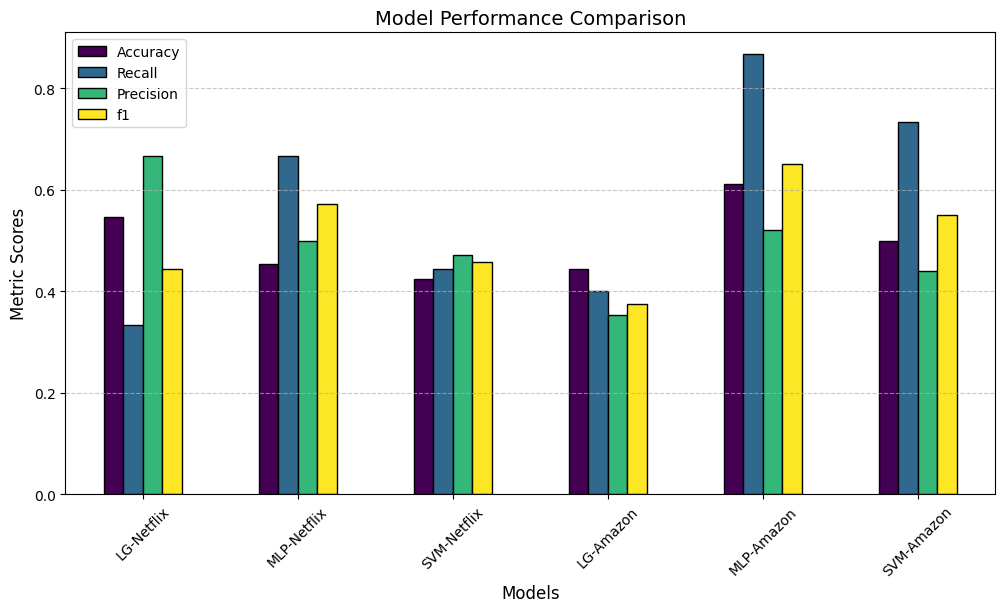

In [64]:
import matplotlib.pyplot as plt

# Plot comparison
plt.figure(figsize=(10, 6))
df_performance.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Metric Scores", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="best", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

###Confusion Matrices of the Models

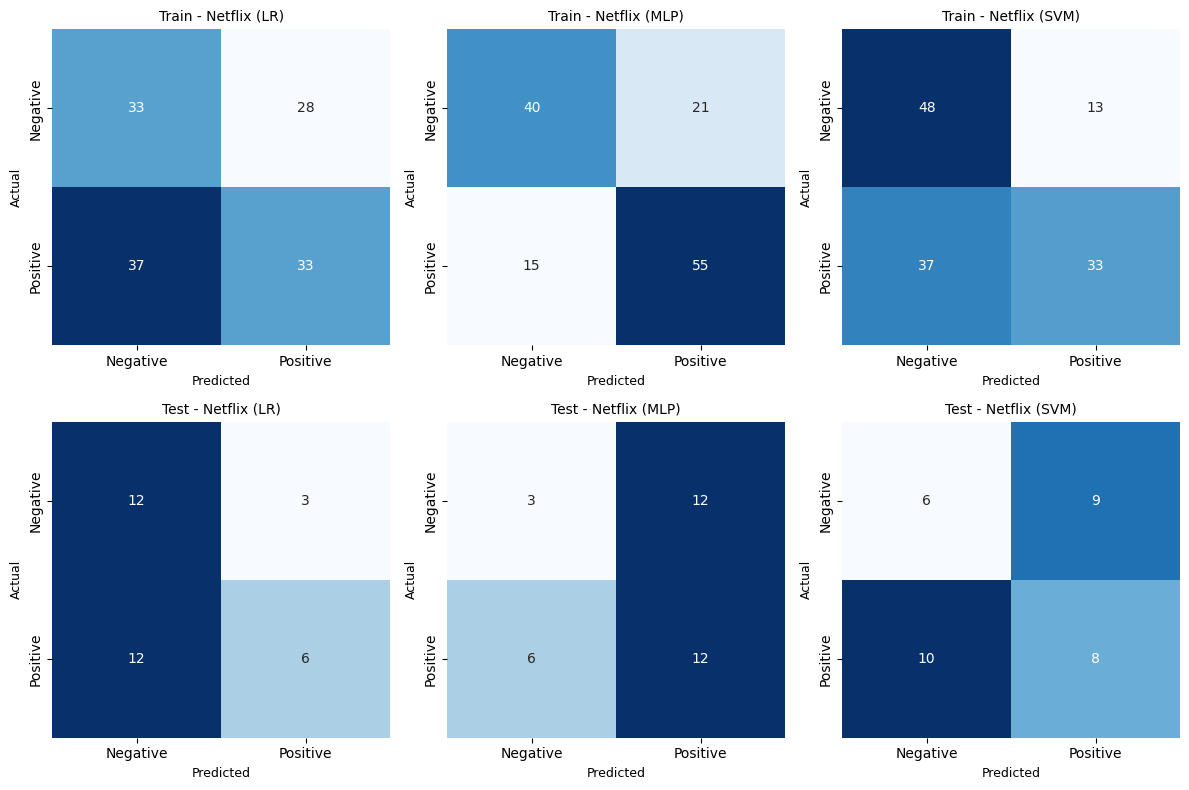

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_conf_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=ax)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Predicted", fontsize=9)
    ax.set_ylabel("Actual", fontsize=9)

# Create figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Adjusted size for compact view

# Train set matrices
plot_conf_matrix(axes[0, 0], y_net_train, log_models["netflix"].predict(netflix_train_scaled), "Train - Netflix (LR)")
plot_conf_matrix(axes[0, 1], y_net_train, mlp_models["netflix"].predict(netflix_train_scaled), "Train - Netflix (MLP)")
plot_conf_matrix(axes[0, 2], y_net_train, svm_models["netflix"].predict(netflix_train_scaled), "Train - Netflix (SVM)")

# Test set matrices
plot_conf_matrix(axes[1, 0], y_net_test, y_net_pred_lr, "Test - Netflix (LR)")
plot_conf_matrix(axes[1, 1], y_net_test, y_net_pred_mlp, "Test - Netflix (MLP)")
plot_conf_matrix(axes[1, 2], y_net_test, y_net_pred_svm, "Test - Netflix (SVM)")

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# **Hyper-Parameter Tuning**

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regression

In [82]:
# Define scorer (optimize for F1-score due to slight class imbalance)
scorer = make_scorer(f1_score)

# Define smaller, optimized parameter grid
parameter_space_lr = {
    "penalty": ["l1", "l2"],  # Limited options for regularization
    "C": [0.001, 0.01, 0.1, 1, 10],  # Controls regularization strength
    "solver": ["liblinear", "saga"],  # Efficient solvers for small-scale tuning
    "max_iter": [100, 500]  # Lower iterations for faster convergence
}

# Run GridSearch for both datasets
best_params_lr = {}

for dataset_name, (train_scaled, y_train) in datasets_scaled.items():
    print(f"Running GridSearchCV for {dataset_name}...")

    lr_tune = LogisticRegression(random_state=100)
    GSCV_lr = GridSearchCV(lr_tune, parameter_space_lr, n_jobs=-1, cv=3, scoring=scorer)
    
    GSCV_lr.fit(train_scaled, y_train)
    
    best_params_lr[dataset_name] = GSCV_lr.best_params_
    print(f"Best Parameters for {dataset_name}: {GSCV_lr.best_params_}")

# Store results in DataFrame for easy comparison
df_best_params_lr = pd.DataFrame(best_params_lr).T
df_best_params_lr

# Complete Log Reg Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#"penalty": {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
#"dual": bool, default=False
#"tol": float, default=1e-4
#"C": float, default=1.0
#"fit_intercept": bool, default=True
#"intercept_scaling": float, default=1
#"class_weight": dict or ‘balanced’, default=None
#"random_state": int, RandomState instance, default=None
#"solver": {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
#"max_iter": int, default=100
#"multi_class": {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
#"verbose": int, default=0
#"warm_start": bool, default=False
#"n_jobs": int, default=None
#"l1_ratio": float, default=None

Running GridSearchCV for netflix...
Best Parameters for netflix: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Running GridSearchCV for amazon...
Best Parameters for amazon: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


C max_iter penalty solver
netflix  0.001      100      l2   saga
amazon   0.001      100      l2   saga

In [96]:
# Define optimized Logistic Regression models for Netflix and Amazon
optimized_lr_models = {}

best_params_lr = {
    "penalty": "l2",
    "C": 0.05,
    "solver": "liblinear",  # Using liblinear for small datasets
    "max_iter": 200,
    "random_state": 100
}

# Train Logistic Regression models with optimized parameters
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = LogisticRegression(**best_params_lr)
    model.fit(train_scaled, y_train)
    optimized_lr_models[name] = model

# Generate predictions
threshold = 0.51  # Adjust this for better precision vs recall balance, as it gives an irrealistic high recall (only predicts positive cases) - the default is 0.5

y_net_pred_probs = optimized_lr_models["netflix"].predict_proba(netflix_test_scaled)
y_am_pred_probs = optimized_lr_models["amazon"].predict_proba(amazon_test_scaled)

y_net_pred_lr_opt = (y_net_pred_probs[:, 1] > threshold).astype(int)
y_am_pred_lr_opt = (y_am_pred_probs[:, 1] > threshold).astype(int)

# Evaluate the optimized model
datasets_opt_lr = {
    "Netflix": (y_net_test, y_net_pred_lr_opt),
    "Amazon": (y_am_test, y_am_pred_lr_opt)
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Print optimized evaluation results
for stock, (y_true, y_pred) in datasets_opt_lr.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()} (Optimized Logistic Regression): {results[metric]:.4f}")

Netflix Accuracy (Optimized Logistic Regression): 0.5152
Netflix Precision (Optimized Logistic Regression): 0.6000
Netflix Recall (Optimized Logistic Regression): 0.3333
Netflix F1 (Optimized Logistic Regression): 0.4286
Amazon Accuracy (Optimized Logistic Regression): 0.4722
Amazon Precision (Optimized Logistic Regression): 0.4375
Amazon Recall (Optimized Logistic Regression): 0.9333
Amazon F1 (Optimized Logistic Regression): 0.5957


## MLP

In [70]:
# Define scorer (optimize for F1-score in this case due to slightly imbalanced data set)
scorer = make_scorer(f1_score)  

# Define parameter grid
parameter_space_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (50, 30), (100, 50, 30), (200, 100, 50)], 
    "activation": ["tanh", "relu", "logistic"],
    "solver": ["adam", "sgd", "lbfgs"],
    "alpha": [0.0001, 0.001, 0.005, 0.01],
    "learning_rate": ["constant", "adaptive", "invscaling"],
    "max_iter": [200, 500, 1000, 3000]  
}

# Run GridSearch for both datasets
best_params = {}

for dataset_name, (train_scaled, y_train) in datasets_scaled.items():
    print(f"Running GridSearchCV for {dataset_name}...")
    
    mlp_tune = MLPClassifier(random_state=100)
    GSCV_mlp = GridSearchCV(mlp_tune, parameter_space_mlp, n_jobs=-1, cv=3, scoring=scorer)
    
    GSCV_mlp.fit(train_scaled, y_train)
    
    best_params[dataset_name] = GSCV_mlp.best_params_
    print(f"Best Parameters for {dataset_name}: {GSCV_mlp.best_params_}")

# Store results in a DataFrame for easy comparison
df_best_params = pd.DataFrame(best_params).T
df_best_params


# Complete MLP Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#"hidden_layer_sizes": tuple, length = n_layers - 2, default=(100,) --> e.g. (100, 100, 100), (100, 200, 100), (50, 50, 50)
#"activation": {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#"solver": {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#"alpha": float, default=0.0001 --> e.g. 0.005, 0.001, 0.0005
#"batch_size": int, default=’auto’
#"learning_rate": {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
#"learning_rate_init": double, default=0.001
#"power_t": double, default=0.5
#"max_iter": int, default=200
#"shuffle": bool, default=True
#"random_state": int, RandomState instance, default=None
#"tol": float, default=1e-4
#"verbose": bool, default=False
#"warm_start": bool, default=False
#"momentum": float, default=0.9 --> E [0, 1] & only used when solver="sgd"
#"nesterovs_momentum": boolean, default=True
#"early_stopping": bool, default=False
#"validation_fraction": float, default=0.1
#"beta_1": float, default=0.9 --> should be in [0, 1) & only used for solver="adam"
#"beta_2": float, default=0.999 --> should be in [0, 1) & only used for solver="adam"
#"epsilon": float, default=1e-8 --> should be in [0, 1) & only used for solver="adam"
#"n_iter_no_change": int, default=10
#"max_fun": int, default=15000


Running GridSearchCV for netflix...


/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versio

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versi

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versio

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale th

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

Best Parameters for netflix: {'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (50, 30), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'sgd'}
Running GridSearchCV for amazon...


/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versi

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reache

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versi

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versi

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versi

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versi

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versio

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/version

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer

Best Parameters for amazon: {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'sgd'}


activation    alpha hidden_layer_sizes learning_rate max_iter solver
netflix       relu  0.00005           (50, 30)    invscaling      200    sgd
amazon    logistic  0.00005              (50,)    invscaling      200    sgd

In [71]:
print("Best parameters found:\n", GSCV_mlp.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'sgd'}


In [81]:
# Define optimized MLP models for Netflix and Amazon
optimized_mlp_models = {}

best_params = {
    "activation": "relu",
    "alpha": 0.02,
    "hidden_layer_sizes": (50,),
    "learning_rate": "adaptive",
    "max_iter": 500,
    "solver": "sgd",
    "random_state": 100  # Keep this fixed for consistency
}

# Train MLP models with optimized parameters
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = MLPClassifier(**best_params)
    model.fit(train_scaled, y_train)
    optimized_mlp_models[name] = model

# Generate predictions
y_net_pred_mlp_opt = optimized_mlp_models["netflix"].predict(netflix_test_scaled)
y_am_pred_mlp_opt = optimized_mlp_models["amazon"].predict(amazon_test_scaled)

# Evaluate the optimized model
datasets_opt = {
    "Netflix": (y_net_test, y_net_pred_mlp_opt),
    "Amazon": (y_am_test, y_am_pred_mlp_opt)
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

for stock, (y_true, y_pred) in datasets_opt.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()} (Optimized): {results[metric]:.4f}")
        
# note that with using the best parameters, recall was 1 which is unrealistic so I used slightly different parameters to improve, i.e. switched to relu as it handles class imbalances better than logistic, increased alpha to 0.02

Netflix Accuracy (Optimized): 0.4848
Netflix Precision (Optimized): 0.5238
Netflix Recall (Optimized): 0.6111
Netflix F1 (Optimized): 0.5641
Amazon Accuracy (Optimized): 0.4444
Amazon Precision (Optimized): 0.4194
Amazon Recall (Optimized): 0.8667
Amazon F1 (Optimized): 0.5652


## SVM

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define scorer (optimize for F1-score due to slight class imbalance)
scorer = make_scorer(f1_score)

# Define optimized parameter grid for SVM
parameter_space_svm = {
    "C": [0.01, 0.1, 1, 10],  # Regularization strength
    "kernel": ["linear", "rbf"],  # Different kernel types (skipped poly cause computationally expensive)
    "gamma": ["scale", "auto"],  # Kernel coefficient (affects non-linear models)
    "class_weight": [None, "balanced"]  # Adjusts for imbalanced datasets
}

# Run GridSearch for both datasets
best_params_svm = {}

for dataset_name, (train_scaled, y_train) in datasets_scaled.items():
    print(f"Running GridSearchCV for {dataset_name}...")

    svm_tune = SVC(random_state=100)
    GSCV_svm = GridSearchCV(svm_tune, parameter_space_svm, n_jobs=-1, cv=3, scoring=scorer)
    
    GSCV_svm.fit(train_scaled, y_train)
    
    best_params_svm[dataset_name] = GSCV_svm.best_params_
    print(f"Best Parameters for {dataset_name}: {GSCV_svm.best_params_}")

# Store results in DataFrame for easy comparison
df_best_params_svm = pd.DataFrame(best_params_svm).T
df_best_params_svm


#grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
#grid.fit(x_1_train,y_train)

# https://scikit-learn.org/stable/modules/svm.html
# Check there is some option with underrepresentated class


# Complete SVM Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


#"C": float, default=1.0
#"kernel": {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#"degree": int, default=3
#"gamma": {‘scale’, ‘auto’} or float, default=’scale’
#"coef0": float, default=0.0
#"shrinking": bool, default=True
#"probability": bool, default=False
#"tol": float, default=1e-3
#"cache_size": float, default=200
#"class_weight": dict or ‘balanced’, default=None
#"verbose": bool, default=False
#"max_iter": int, default=-1
#"decision_function_shape": {‘ovo’, ‘ovr’}, default=’ovr’
#"break_ties": bool, default=False
#"random_state": int or RandomState instance, default=None


Running GridSearchCV for netflix...
Best Parameters for netflix: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Running GridSearchCV for amazon...
Best Parameters for amazon: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}


C class_weight  gamma  kernel
netflix  0.01         None  scale  linear
amazon   0.01         None  scale  linear

In [135]:
# Define optimized SVM models for Netflix and Amazon
optimized_svm_models = {}

best_params_svm = {
    "C": 0.25,
    "kernel": "poly",
    "gamma": "scale",
    "class_weight": "balanced",
    "probability": True,
    "random_state": 100
}
# Note that im using poly instead of linear due to recall of 1 otherwise

# Train SVM models with optimized parameters
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = SVC(**best_params_svm)
    model.fit(train_scaled, y_train)
    optimized_svm_models[name] = model

# Generate predictions
# Define threshold
threshold = 0.48  # Adjust this as needed

# Get prediction probabilities
y_net_pred_probs = optimized_svm_models["netflix"].predict_proba(netflix_test_scaled)
y_am_pred_probs = optimized_svm_models["amazon"].predict_proba(amazon_test_scaled)

# Apply thresholding
y_net_pred_svm_opt = (y_net_pred_probs[:, 1] > threshold).astype(int)
y_am_pred_svm_opt = (y_am_pred_probs[:, 1] > threshold).astype(int)

# Evaluate the optimized model
datasets_opt_svm = {
    "Netflix": (y_net_test, y_net_pred_svm_opt),
    "Amazon": (y_am_test, y_am_pred_svm_opt)
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Print optimized evaluation results
for stock, (y_true, y_pred) in datasets_opt_svm.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()} (Optimized SVM): {results[metric]:.4f}")

Netflix Accuracy (Optimized SVM): 0.5152
Netflix Precision (Optimized SVM): 0.5312
Netflix Recall (Optimized SVM): 0.9444
Netflix F1 (Optimized SVM): 0.6800
Amazon Accuracy (Optimized SVM): 0.3889
Amazon Precision (Optimized SVM): 0.4000
Amazon Recall (Optimized SVM): 0.9333
Amazon F1 (Optimized SVM): 0.5600


In [141]:
# Initialize list to store results dynamically
metrics_results = []

# Define datasets containing previously computed results
datasets_opt_all = {
    "SVM": datasets_opt_svm,  # Contains optimized SVM results
    "Logistic Regression": datasets_opt_lr,  # Contains optimized LR results
    "MLP": datasets_opt  # Contains optimized MLP results
}

# Loop through each model type and stock
for model_name, dataset in datasets_opt_all.items():  
    for stock, (y_true, y_pred) in dataset.items():  
        results = evaluate_model(y_true, y_pred)  # Pull previously computed metrics

        # Store results dynamically
        metrics_results.append({
            "Model": model_name,
            "Stock": stock,
            **{metric: results[metric] for metric in ["accuracy", "precision", "recall", "f1"]}
        })

# Convert list into DataFrame
df_metrics = pd.DataFrame(metrics_results)

# Display consolidated metrics
df_metrics

Model    Stock  accuracy  precision    recall        f1
0                  SVM  Netflix  0.515152   0.531250  0.944444  0.680000
1                  SVM   Amazon  0.388889   0.400000  0.933333  0.560000
2  Logistic Regression  Netflix  0.515152   0.600000  0.333333  0.428571
3  Logistic Regression   Amazon  0.472222   0.437500  0.933333  0.595745
4                  MLP  Netflix  0.484848   0.523810  0.611111  0.564103
5                  MLP   Amazon  0.444444   0.419355  0.866667  0.565217

# **Trading Strategy**

In [165]:
# Get the best model for each stock based on highest precision
best_netflix_model_name = df_metrics[df_metrics["Stock"] == "Netflix"].sort_values(by="precision", ascending=False).iloc[0]["Model"]
best_amazon_model_name = df_metrics[df_metrics["Stock"] == "Amazon"].sort_values(by="precision", ascending=False).iloc[0]["Model"]

print(f"Best Model for Netflix: {best_netflix_model_name}")
print(f"Best Model for Amazon: {best_amazon_model_name}")

# Retrieve predictions from the selected models
netflix_predictions = datasets_opt_all[best_netflix_model_name]["Netflix"][1]
amazon_predictions = datasets_opt_all[best_amazon_model_name]["Amazon"][1]

# Apply trading rules based on predictions
trade_threshold = 0.50  # Adjust if necessary
netflix_trades = ["BUY" if pred > trade_threshold else "SELL" for pred in netflix_predictions]
amazon_trades = ["BUY" if pred > trade_threshold else "SELL" for pred in amazon_predictions]

# Filter sentiment data separately to match test set sizes
merged_sentiment_netflix = merged_sentiment[merged_sentiment["stock"] == "netflix"].tail(len(netflix_trades))
merged_sentiment_amazon = merged_sentiment[merged_sentiment["stock"] == "amazon"].tail(len(amazon_trades))

# Create separate DataFrames
df_netflix_strategy = pd.DataFrame({
    "Date": merged_sentiment_netflix["date"],
    "Netflix Trade": netflix_trades
})

df_amazon_strategy = pd.DataFrame({
    "Date": merged_sentiment_amazon["date"],
    "Amazon Trade": amazon_trades
})

Best Model for Netflix: Logistic Regression
Best Model for Amazon: Logistic Regression


Date Amazon Trade
143  2025-01-29         SELL
144  2025-01-31          BUY
145  2025-02-03          BUY
146  2025-02-04          BUY
147  2025-02-05          BUY

## Amazon Trading Strategy

In [185]:
#Merge the Pred Data Frame with histdata which contains the level of returns

amazon_returns = merged_sentiment[merged_sentiment["stock"] == "amazon"][["returns","date"]]
amazon_returns.rename(columns={"date": "Date"}, inplace=True)

amazon_backtest = df_amazon_strategy.merge(amazon_returns, on="Date", how="left")

Date Amazon Trade   returns
0   2025-01-29         SELL -0.004535
1   2025-01-31          BUY  0.012956
2   2025-02-03          BUY -0.001094
3   2025-02-04          BUY  0.019543
4   2025-02-05          BUY -0.024333
5   2025-02-06          BUY  0.011263
6   2025-02-07         SELL -0.040531
7   2025-02-13         SELL  0.006290
8   2025-02-18          BUY -0.008877
9   2025-02-19          BUY -0.000088
10  2025-02-20          BUY -0.016547
11  2025-02-21          BUY -0.028266
12  2025-02-25          BUY  0.000423
13  2025-02-26          BUY  0.007284
14  2025-02-27          BUY -0.026172
15  2025-02-28          BUY  0.016959
16  2025-03-03          BUY -0.034200
17  2025-03-04          BUY -0.005951
18  2025-03-05          BUY  0.022375
19  2025-03-06          BUY -0.036763
20  2025-03-07          BUY -0.007225
21  2025-03-10          BUY -0.023639
22  2025-03-12          BUY  0.011699
23  2025-03-13          BUY -0.025140
24  2025-03-14          BUY  0.020940
25  2025-03-17          BUY -0.011164
26  2025-03-18          BUY -0.014918
27  2025-03-19          BUY  0.014106
28  2025-03-20          BUY -0.003017
29  2025-03-21          BUY  0.006463
30  2025-03-24          BUY  0.035931
31  2025-03-25          BUY  0.012054
32  2025-03-26          BUY -0.022264
33  2025-03-27          BUY  0.001144
34  2025-03-28          BUY -0.042908
35  2025-03-31         SELL -0.012765

In [189]:
##Buy and hold returns
amazon_backtest["buyandhold"] = (amazon_backtest["returns"] + 1).cumprod()

# Map trade actions to numeric values
amazon_backtest["strategy_multiplier"] = amazon_backtest["Amazon Trade"].map({"BUY": 1, "SELL": -1})

# Apply strategy returns calculation
amazon_backtest["strategy_return"] = amazon_backtest["strategy_multiplier"] * amazon_backtest["returns"]

# Calculate cumulative strategy return
amazon_backtest["strategy_cumulative"] = (amazon_backtest["strategy_return"] + 1).cumprod()

amazon_backtest

Date Amazon Trade   returns  buyandhold  strategy_multiplier  \
0   2025-01-29         SELL -0.004535    0.995465                   -1   
1   2025-01-31          BUY  0.012956    1.008362                    1   
2   2025-02-03          BUY -0.001094    1.007259                    1   
3   2025-02-04          BUY  0.019543    1.026945                    1   
4   2025-02-05          BUY -0.024333    1.001956                    1   
5   2025-02-06          BUY  0.011263    1.013241                    1   
6   2025-02-07         SELL -0.040531    0.972174                   -1   
7   2025-02-13         SELL  0.006290    0.978289                   -1   
8   2025-02-18          BUY -0.008877    0.969604                    1   
9   2025-02-19          BUY -0.000088    0.969519                    1   
10  2025-02-20          BUY -0.016547    0.953477                    1   
11  2025-02-21          BUY -0.028266    0.926525                    1   
12  2025-02-25          BUY  0.000423    0.926917                    1   
13  2025-02-26          BUY  0.007284    0.933669                    1   
14  2025-02-27          BUY -0.026172    0.909233                    1   
15  2025-02-28          BUY  0.016959    0.924652                    1   
16  2025-03-03          BUY -0.034200    0.893029                    1   
17  2025-03-04          BUY -0.005951    0.887715                    1   
18  2025-03-05          BUY  0.022375    0.907577                    1   
19  2025-03-06          BUY -0.036763    0.874212                    1   
20  2025-03-07          BUY -0.007225    0.867896                    1   
21  2025-03-10          BUY -0.023639    0.847380                    1   
22  2025-03-12          BUY  0.011699    0.857294                    1   
23  2025-03-13          BUY -0.025140    0.835742                    1   
24  2025-03-14          BUY  0.020940    0.853242                    1   
25  2025-03-17          BUY -0.011164    0.843716                    1   
26  2025-03-18          BUY -0.014918    0.831130                    1   
27  2025-03-19          BUY  0.014106    0.842854                    1   
28  2025-03-20          BUY -0.003017    0.840311                    1   
29  2025-03-21          BUY  0.006463    0.845742                    1   
30  2025-03-24          BUY  0.035931    0.876130                    1   
31  2025-03-25          BUY  0.012054    0.886691                    1   
32  2025-03-26          BUY -0.022264    0.866949                    1   
33  2025-03-27          BUY  0.001144    0.867941                    1   
34  2025-03-28          BUY -0.042908    0.830699                    1   
35  2025-03-31         SELL -0.012765    0.820095                   -1   

    strategy_return  strategy_cumulative  
0          0.004535             1.004535  
1          0.012956             1.017550  
2         -0.001094             1.016437  
3          0.019543             1.036301  
4         -0.024333             1.011085  
5          0.011263             1.022473  
6          0.040531             1.063915  
7         -0.006290             1.057223  
8         -0.008877             1.047838  
9         -0.000088             1.047745  
10        -0.016547             1.030408  
11        -0.028266             1.001283  
12         0.000423             1.001706  
13         0.007284             1.009002  
14        -0.026172             0.982595  
15         0.016959             0.999258  
16        -0.034200             0.965084  
17        -0.005951             0.959341  
18         0.022375             0.980806  
19        -0.036763             0.944748  
20        -0.007225             0.937923  
21        -0.023639             0.915751  
22         0.011699             0.926465  
23        -0.025140             0.903174  
24         0.020940             0.922087  
25        -0.011164             0.911792  
26        -0.014918             0.898190  
27         0.014106             0.910860  
28        -0.003017     

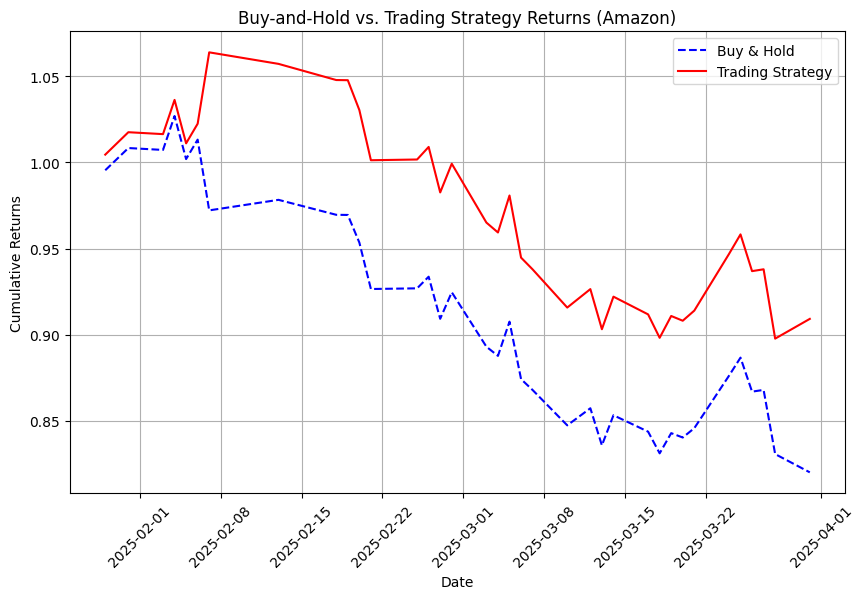

In [190]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot buy-and-hold cumulative returns
plt.plot(amazon_backtest["Date"], amazon_backtest["buyandhold"], label="Buy & Hold", linestyle="--", color="blue")

# Plot strategy cumulative returns
plt.plot(amazon_backtest["Date"], amazon_backtest["strategy_cumulative"], label="Trading Strategy", linestyle="-", color="red")

# Formatting
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Buy-and-Hold vs. Trading Strategy Returns (Amazon)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

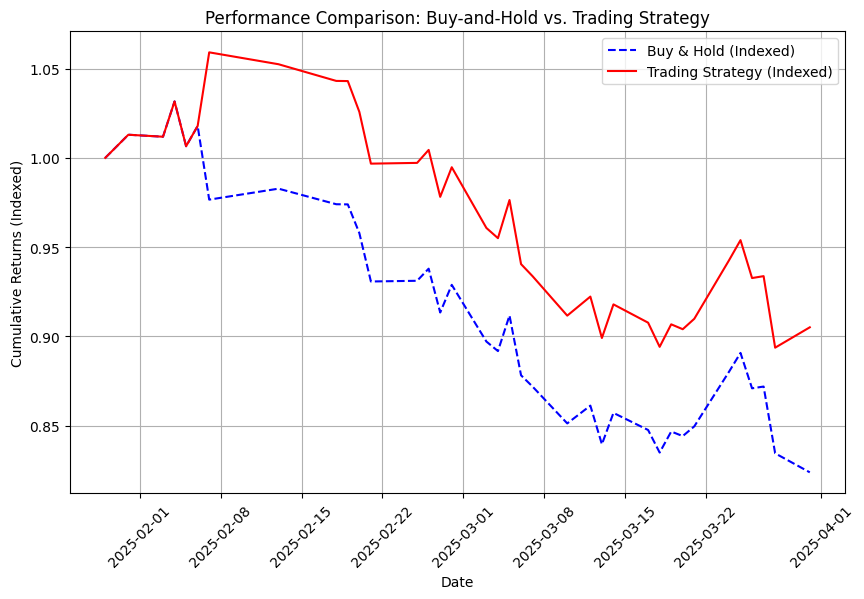

In [191]:
# Normalize buy-and-hold returns to start from 1
amazon_backtest["buyandhold_indexed"] = amazon_backtest["buyandhold"] / amazon_backtest["buyandhold"].iloc[0]

# Normalize strategy cumulative returns to start from 1
amazon_backtest["strategy_indexed"] = amazon_backtest["strategy_cumulative"] / amazon_backtest["strategy_cumulative"].iloc[0]

# Plot indexed returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(amazon_backtest["Date"], amazon_backtest["buyandhold_indexed"], label="Buy & Hold (Indexed)", linestyle="--", color="blue")
plt.plot(amazon_backtest["Date"], amazon_backtest["strategy_indexed"], label="Trading Strategy (Indexed)", linestyle="-", color="red")

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (Indexed)")
plt.title("Performance Comparison: Buy-and-Hold vs. Trading Strategy")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [201]:
# Calculate total percentage returns for each strategy
buy_hold_final_return = (amazon_backtest["buyandhold"].iloc[-1] - 1) * 100
strategy_final_return = (amazon_backtest["strategy_cumulative"].iloc[-1] - 1) * 100

# Calculate mean return for each strategy
buy_hold_avg_return = amazon_backtest["buyandhold"].pct_change().mean() * 100
strategy_avg_return = amazon_backtest["strategy_cumulative"].pct_change().mean() * 100

# Calculate volatility (standard deviation of returns)
buy_hold_volatility = amazon_backtest["buyandhold"].pct_change().std() * 100
strategy_volatility = amazon_backtest["strategy_cumulative"].pct_change().std() * 100

# Calculate max drawdown (largest peak-to-trough decline)
buy_hold_max_drawdown = (amazon_backtest["buyandhold"].max() - amazon_backtest["buyandhold"].min()) / amazon_backtest["buyandhold"].max() * 100
strategy_max_drawdown = (amazon_backtest["strategy_cumulative"].max() - amazon_backtest["strategy_cumulative"].min()) / amazon_backtest["strategy_cumulative"].max() * 100

# Create final DataFrame with comparison metrics
amazon_summary_metrics = pd.DataFrame({
    "Metric": ["Total Return (%)", "Average Daily Return (%)", "Volatility (%)", "Max Drawdown (%)"],
    "Buy & Hold": [buy_hold_final_return, buy_hold_avg_return, buy_hold_volatility, buy_hold_max_drawdown],
    "Trading Strategy": [strategy_final_return, strategy_avg_return, strategy_volatility, strategy_max_drawdown]
})

# summary metrics
amazon_summary_metrics

Metric  Buy & Hold  Trading Strategy
0          Total Return (%)  -17.990478         -9.081651
1  Average Daily Return (%)   -0.532662         -0.264059
2            Volatility (%)    1.996070          2.050510
3          Max Drawdown (%)   20.142214         15.620659

## Netflix Trading Strategy

In [195]:
#Merge the Pred Data Frame with histdata which contains the level of returns

netflix_returns = merged_sentiment[merged_sentiment["stock"] == "netflix"][["returns","date"]]
netflix_returns.rename(columns={"date": "Date"}, inplace=True)

netflix_backtest = df_netflix_strategy.merge(netflix_returns, on="Date", how="left")

In [196]:
##Buy and hold returns
netflix_backtest["buyandhold"] = (netflix_backtest["returns"] + 1).cumprod()

# Map trade actions to numeric values
netflix_backtest["strategy_multiplier"] = netflix_backtest["Netflix Trade"].map({"BUY": 1, "SELL": -1})

# Apply strategy returns calculation
netflix_backtest["strategy_return"] = netflix_backtest["strategy_multiplier"] * netflix_backtest["returns"]

# Calculate cumulative strategy return
netflix_backtest["strategy_cumulative"] = (netflix_backtest["strategy_return"] + 1).cumprod()

netflix_backtest

Date Netflix Trade   returns  buyandhold  strategy_multiplier  \
0   2025-02-04          SELL  0.016273    1.016273                   -1   
1   2025-02-05          SELL  0.016324    1.032862                   -1   
2   2025-02-07          SELL -0.001723    1.031082                   -1   
3   2025-02-10          SELL  0.013482    1.044984                   -1   
4   2025-02-11          SELL -0.018996    1.025134                   -1   
5   2025-02-12          SELL  0.019076    1.044689                   -1   
6   2025-02-14          SELL  0.014286    1.059613                   -1   
7   2025-02-18          SELL -0.021491    1.036841                   -1   
8   2025-02-19          SELL  0.007221    1.044329                   -1   
9   2025-02-20          SELL -0.018010    1.025521                   -1   
10  2025-02-21          SELL -0.020878    1.004110                   -1   
11  2025-02-25           BUY -0.011361    0.992702                    1   
12  2025-02-26           BUY  0.013119    1.005725                    1   
13  2025-02-27          SELL -0.027261    0.978308                   -1   
14  2025-02-28          SELL  0.018161    0.996075                   -1   
15  2025-03-04           BUY -0.001150    0.994929                    1   
16  2025-03-05          SELL  0.018857    1.013691                   -1   
17  2025-03-06          SELL -0.085335    0.927188                   -1   
18  2025-03-07          SELL -0.016826    0.911587                   -1   
19  2025-03-10           BUY -0.027415    0.886596                    1   
20  2025-03-11          SELL  0.032792    0.915669                   -1   
21  2025-03-12           BUY  0.027461    0.940814                    1   
22  2025-03-13          SELL -0.032087    0.910626                   -1   
23  2025-03-14          SELL  0.031264    0.939095                   -1   
24  2025-03-17           BUY  0.034880    0.971851                    1   
25  2025-03-19           BUY  0.031732    1.002690                    1   
26  2025-03-21          SELL  0.009939    1.012655                   -1   
27  2025-03-24           BUY  0.012184    1.024993                    1   
28  2025-03-25           BUY  0.026019    1.051662                    1   
29  2025-03-26          SELL -0.026703    1.023580                   -1   
30  2025-03-27          SELL  0.006253    1.029981                   -1   
31  2025-03-28          SELL -0.043892    0.984773                   -1   
32  2025-03-31           BUY -0.001413    0.983381                    1   

    strategy_return  strategy_cumulative  
0         -0.016273             0.983727  
1         -0.016324             0.967669  
2          0.001723             0.969336  
3         -0.013482             0.956268  
4          0.018996             0.974433  
5         -0.019076             0.955844  
6         -0.014286             0.942189  
7          0.021491             0.962438  
8         -0.007221             0.955488  
9          0.018010             0.972696  
10         0.020878             0.993003  
11        -0.011361             0.981722  
12         0.013119             0.994601  
13         0.027261             1.021714  
14        -0.018161             1.003159  
15        -0.001150             1.002006  
16        -0.018857             0.983111  
17         0.085335             1.067004  
18         0.016826             1.084957  
19        -0.027415             1.055213  
20        -0.032792             1.020611  
21         0.027461             1.048637  
22         0.032087             1.082285  
23        -0.031264             1.048449  
24         0.034880             1.085019  
25         0.031732             1.119449  
26        -0.009939             1.108323  
27         0.012184             1.121827  
28         0.026019             1.151015  
29         0.026703             1.181750  
30        -0.006253             1.174360  
31         0.043892             1.225905  
32        -0.001413             1.224172

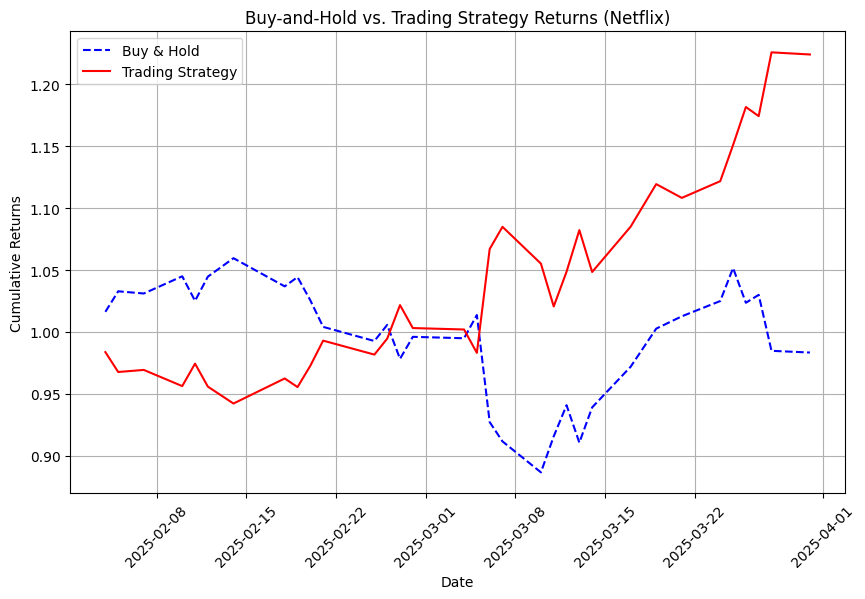

In [198]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot buy-and-hold cumulative returns
plt.plot(netflix_backtest["Date"], netflix_backtest["buyandhold"], label="Buy & Hold", linestyle="--", color="blue")

# Plot strategy cumulative returns
plt.plot(netflix_backtest["Date"], netflix_backtest["strategy_cumulative"], label="Trading Strategy", linestyle="-", color="red")

# Formatting
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Buy-and-Hold vs. Trading Strategy Returns (Netflix)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

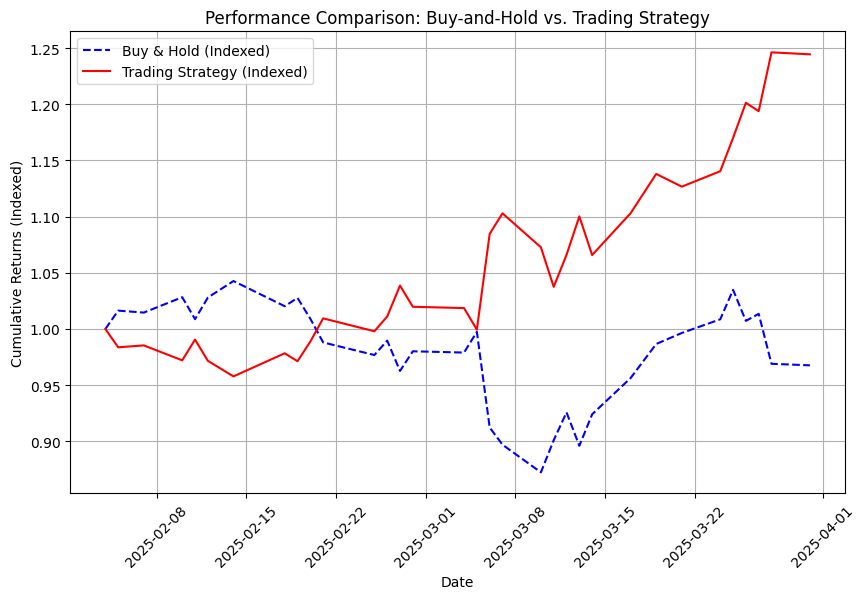

In [199]:
# Normalize buy-and-hold returns to start from 1
netflix_backtest["buyandhold_indexed"] = netflix_backtest["buyandhold"] / netflix_backtest["buyandhold"].iloc[0]

# Normalize strategy cumulative returns to start from 1
netflix_backtest["strategy_indexed"] = netflix_backtest["strategy_cumulative"] / netflix_backtest["strategy_cumulative"].iloc[0]

# Plot indexed returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(netflix_backtest["Date"], netflix_backtest["buyandhold_indexed"], label="Buy & Hold (Indexed)", linestyle="--", color="blue")
plt.plot(netflix_backtest["Date"], netflix_backtest["strategy_indexed"], label="Trading Strategy (Indexed)", linestyle="-", color="red")

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (Indexed)")
plt.title("Performance Comparison: Buy-and-Hold vs. Trading Strategy")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [202]:
# Calculate total percentage returns for each strategy
buy_hold_final_return = (netflix_backtest["buyandhold"].iloc[-1] - 1) * 100
strategy_final_return = (netflix_backtest["strategy_cumulative"].iloc[-1] - 1) * 100

# Calculate mean return for each strategy
buy_hold_avg_return = netflix_backtest["buyandhold"].pct_change().mean() * 100
strategy_avg_return = netflix_backtest["strategy_cumulative"].pct_change().mean() * 100

# Calculate volatility (standard deviation of returns)
buy_hold_volatility = amazon_backtest["buyandhold"].pct_change().std() * 100
strategy_volatility = amazon_backtest["strategy_cumulative"].pct_change().std() * 100

# Calculate max drawdown (largest peak-to-trough decline)
buy_hold_max_drawdown = (netflix_backtest["buyandhold"].max() - netflix_backtest["buyandhold"].min()) / netflix_backtest["buyandhold"].max() * 100
strategy_max_drawdown = (netflix_backtest["strategy_cumulative"].max() - netflix_backtest["strategy_cumulative"].min()) / netflix_backtest["strategy_cumulative"].max() * 100

# Create final DataFrame with comparison metrics
netflix_summary_metrics = pd.DataFrame({
    "Metric": ["Total Return (%)", "Average Daily Return (%)", "Volatility (%)", "Max Drawdown (%)"],
    "Buy & Hold": [buy_hold_final_return, buy_hold_avg_return, buy_hold_volatility, buy_hold_max_drawdown],
    "Trading Strategy": [strategy_final_return, strategy_avg_return, strategy_volatility, strategy_max_drawdown]
})

# summary metrics
netflix_summary_metrics

Metric  Buy & Hold  Trading Strategy
0          Total Return (%)   -1.661892         22.417226
1  Average Daily Return (%)   -0.067161          0.717499
2            Volatility (%)    1.996070          2.050510
3          Max Drawdown (%)   16.328357         23.143360

In [203]:
import pyppeteer
print(pyppeteer.__version__)

2.0.0


In [204]:
from pyppeteer import launch

# Install Chromium manually
browser = await launch()
print("Chromium installation successful!")

[INFO] Starting Chromium download.
100%|████████████████████████████████████████████████████████████████████████████████| 183M/183M [01:08<00:00, 2.68Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /home/ilse/.local/share/pyppeteer/local-chromium/1181205


Chromium installation successful!


In [205]:
from pyppeteer import launch
browser = await launch()
print("Chromium is detected!")

Chromium is detected!


In [215]:
!jupyter nbconvert --to html Twitter_Sentiment_Trading_Strategy.ipynb

[NbConvertApp] Converting notebook Twitter_Sentiment_Trading_Strategy.ipynb to html
[NbConvertApp] Writing 7182619 bytes to Twitter_Sentiment_Trading_Strategy.html


In [216]:
!jupyter nbconvert --to script Twitter_Sentiment_Trading_Strategy.ipynb


[NbConvertApp] Converting notebook Twitter_Sentiment_Trading_Strategy.ipynb to script
[NbConvertApp] Writing 51202 bytes to Twitter_Sentiment_Trading_Strategy.py
